# Introduction

A book recommendation system is a type of system which recommends similar books to the readers based on their interest. The most highly suggested novels and books can be found through this recommendation system, saving time for readers who are interested in reading kinds of books. 
The way the book recommendation system operates is by entering the book title and using that information to identify other books of a similar kind that the user might also find interesting.

# Datasets

The follwoing datasets are going to be used to approach the project objective:
* BX-Users: contains users'data (UserId, Age, Location)
* BX-Books: contains books'data (ISBN, Book Title, Book Author, Year of Publication, Publisher, Image)
* BX-Book-Ratings: contains rated books per user data (UserId, ISBN, Rating)

# Libraries and Utlities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pyl

import os
import requests
import warnings

%matplotlib inline

from PIL import Image
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Analyse, prepare and clean users dataset.

In [2]:
df_users = pd.read_csv('data/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")

In [3]:
df_users.head(10) # show first 10 rows

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [4]:
df_users.tail(10) # show last 10 rows

,User-ID,Location,Age
278848,278849,"georgetown, ontario, canada",23.0
278849,278850,"sergnano, lombardia, italy",NaN
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [5]:
df_users.dtypes # get the type of each cols

User-ID       int64
Location     object
Age         float64
dtype: object

In [6]:
df_users.info() # find out how many non null rows are there per col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [7]:
df_users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [8]:
average = df_users['Age'].mean() 
average # determine the average of Age col

34.75143370454978

In [9]:
df_users[df_users['Age'].isnull()][['Location', 'Age']] # get the location when Age is NAN

,Location,Age
0,"nyc, new york, usa",NaN
2,"moscow, yukon territory, russia",NaN
4,"farnborough, hants, united kingdom",NaN
6,"washington, dc, usa",NaN
7,"timmins, ontario, canada",NaN
...,...,...
278849,"sergnano, lombardia, italy",NaN
278853,"portland, oregon, usa",NaN
278855,"brampton, ontario, canada",NaN
278856,"knoxville, tennessee, usa",NaN


In [10]:
average_age = df_users['Age'].mean()

df_users['AgeFill'] = df_users['Age'].fillna(average_age)
df_users.tail(10)
# replacing the NAN ages with the age average 34.7

,User-ID,Location,Age,AgeFill
278848,278849,"georgetown, ontario, canada",23.0,23.000000
278849,278850,"sergnano, lombardia, italy",NaN,34.751434
278850,278851,"dallas, texas, usa",33.0,33.000000
278851,278852,"brisbane, queensland, australia",32.0,32.000000
278852,278853,"stranraer, n/a, united kingdom",17.0,17.000000
278853,278854,"portland, oregon, usa",NaN,34.751434
278854,278855,"tacoma, washington, united kingdom",50.0,50.000000
278855,278856,"brampton, ontario, canada",NaN,34.751434
278856,278857,"knoxville, tennessee, usa",NaN,34.751434
278857,278858,"dublin, n/a, ireland",NaN,34.751434


In [11]:
# show average age per location
df_users.loc[:,['Location', 'Age']].groupby(['Location']).mean()

,Age
Location,
"&#19978;&#28023;, shanghai, china",25.00
"&#19978;&#28023;/&#21488;&#24030;/&#36335;&#26725;, alberta, china",25.00
"&#20013;&#22269;&#24191;&#19996;&#30465;&#24265;&#27743;&#24066;, florida, china",NaN
"&#20013;&#22269;&#27993;&#27743;&#30465;&#27704;&#24247;&#24066;, , china",17.00
"&#20013;&#23665;&#24066;, puerto rico, hong kong",NaN
...,...
"ýstanbul, ýstanbul, turkey",25.75
"ýstanbul, ýstanbul/anadolu, turkey",32.00
"ýzmir, connecticut, turkey",27.00


# Split the Location Values:

The Location has three different values seprated by ','. So, splitting it into different cols will make the dataset cleaner.

In [12]:
df_users['Location'].str.split(',')

0                         [nyc,  new york,  usa]
1                  [stockton,  california,  usa]
2            [moscow,  yukon territory,  russia]
3                  [porto,  v.n.gaia,  portugal]
4         [farnborough,  hants,  united kingdom]
                           ...                  
278853                 [portland,  oregon,  usa]
278854    [tacoma,  washington,  united kingdom]
278855             [brampton,  ontario,  canada]
278856             [knoxville,  tennessee,  usa]
278857                  [dublin,  n/a,  ireland]
Name: Location, Length: 278858, dtype: object

In [13]:
split_location =df_users['Location'].str.split(',', n=2, expand=True).rename(columns={0:"City", 1:"Provincy", 2:"Country"})
split_location # split the values seprated with ',' and create 3 new cols "City, Provincy and Country"

,City,Provincy,Country
0,nyc,new york,usa
1,stockton,california,usa
2,moscow,yukon territory,russia
3,porto,v.n.gaia,portugal
4,farnborough,hants,united kingdom
...,...,...,...
278853,portland,oregon,usa
278854,tacoma,washington,united kingdom
278855,brampton,ontario,canada
278856,knoxville,tennessee,usa


In [14]:
df_users[['City', 'Provincy', 'Country']] = df_users['Location'].str.split(',', n=2, expand=True)
df_users # add the created cols with the splitted location's values to the dataset

,User-ID,Location,Age,AgeFill,City,Provincy,Country
0,1,"nyc, new york, usa",NaN,34.751434,nyc,new york,usa
1,2,"stockton, california, usa",18.0,18.000000,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,34.751434,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,17.000000,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,34.751434,farnborough,hants,united kingdom
...,...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,34.751434,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50.0,50.000000,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",NaN,34.751434,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",NaN,34.751434,knoxville,tennessee,usa


# Analyse, prepare and clean books dataset.

In [15]:
df_books = pd.read_csv('data/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [16]:
df_books.head(10) # show first 10 rows

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [17]:
df_books.tail(10) # show last 10 rows

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271350,0762412119,"Burpee Gardening Cyclopedia: A Concise, Up to ...",Allan Armitage,2002,Running Press Book Publishers,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...,http://images.amazon.com/images/P/0762412119.0...
271351,1582380805,Tropical Rainforests: 230 Species in Full Colo...,"Allen M., Ph.D. Young",2001,Golden Guides from St. Martin's Press,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...,http://images.amazon.com/images/P/1582380805.0...
271352,1845170423,Cocktail Classics,David Biggs,2004,Connaught,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...,http://images.amazon.com/images/P/1845170423.0...
271353,014002803X,Anti Death League,Kingsley Amis,1975,Viking Press,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [18]:
df_books.dtypes # get the type of each cols

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [19]:
df_books.info() # find out how many non null rows are there per col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [20]:
df_books[df_books['Book-Author'].isnull()][['ISBN', 'Book-Author', 'Book-Title']] 
# get the book ISBN and name when the Author is NAN

,ISBN,Book-Author,Book-Title
187689,9627982032,NaN,The Credit Suisse Guide to Managing Your Perso...


In [21]:
author_name = "Larissa Anne Downes"
df_books['Book-AuthorFill'] = df_books['Book-Author'].fillna(author_name)
# fill the author name manually

df_books[df_books['Book-AuthorFill'] == author_name][['ISBN', 'Book-Author', 'Book-Title', 'Book-AuthorFill']] 
# gets the row after the author name column is filled

,ISBN,Book-Author,Book-Title,Book-AuthorFill
187689,9627982032,NaN,The Credit Suisse Guide to Managing Your Perso...,Larissa Anne Downes


In [22]:
df_books[df_books['Publisher'].isnull()][['ISBN', 'Publisher', 'Book-Title']] # get the book ISBN when the Publisher is NAN

,ISBN,Publisher,Book-Title
128890,193169656X,NaN,Tyrant Moon
129037,1931696993,NaN,Finders Keepers


In [23]:
# fill the publisher manually
df_books.loc[df_books['ISBN'] == '193169656X', 'Publisher'] = 'Mundania Press LLC'
df_books.loc[df_books['ISBN'] == '1931696993', 'Publisher'] = 'Gallery Books'

In [24]:
df_books[df_books['Image-URL-L'].isnull()][['ISBN', 'Image-URL-L']] 
# get the book ISBN when the Image-URL-L is NAN

,ISBN,Image-URL-L
209538,078946697X,NaN
220731,2070426769,NaN
221678,0789466953,NaN


In [25]:
df_books.drop(['Image-URL-S', 'Image-URL-L'], axis=1, inplace=True)
# drop the image s and l, since there are three different size of images
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-AuthorFill
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,E. J. W. Barber
...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,Paula Danziger
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,Teri Sloat
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,Christine Wicker
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,Plato


# Analyse, prepare and clean books_ratings dataset.

In [26]:
df_ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")

In [27]:
df_ratings.head(10) # show first 10 rows

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [28]:
df_ratings.tail(10) # show last 10 rows

,User-ID,ISBN,Book-Rating
1149770,276704,0679752714,0
1149771,276704,0743211383,7
1149772,276704,080410526X,0
1149773,276704,0806917695,5
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [29]:
df_ratings[df_ratings['Book-Rating'] == 0 ].count() # make use of this research if it is problem to have books with 0 rating
# how many ratings this book get ratings or not per book

User-ID        716109
ISBN           716109
Book-Rating    716109
dtype: int64

In [30]:
df_ratings.dtypes # get the type of each cols

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [31]:
df_ratings.info() # find out how many non null rows are there per col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [32]:
df_ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


# Data visualization

In [33]:
df_rating_to_books = df_ratings.merge(df_books, on='ISBN')
df_rating_to_books.head()
# add ratings with the user-id to the book dataset (when rating is 0 means that no user rated this book)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-AuthorFill
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,M. J. Rose
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,M. J. Rose
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,M. J. Rose
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,M. J. Rose
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,M. J. Rose


In [34]:
df_top_10_books = df_rating_to_books['Book-Title'][df_rating_to_books['Book-Rating'] == 10].value_counts().head(10)
df_top_10_books.dtypes
# top 10 rated books with rating == 10

dtype('int64')

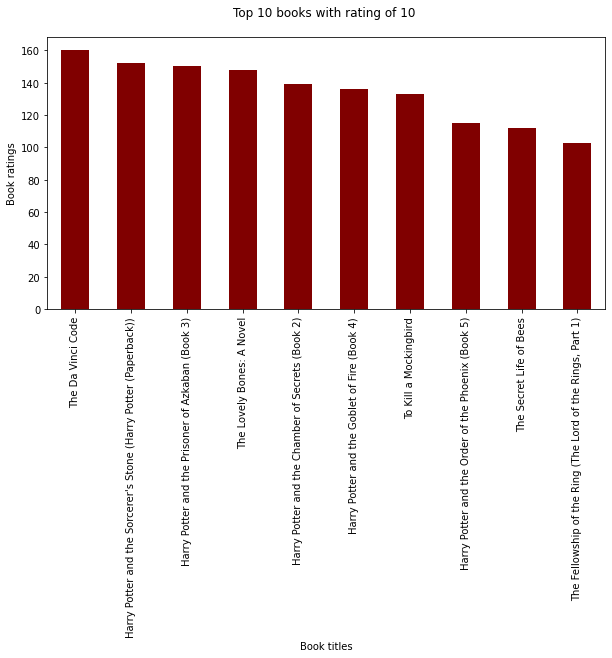

In [35]:
df_top_10_books.plot.bar()
df_top_10_books.plot(kind = 'bar',
                     color = 'maroon',
                    figsize = (10, 5),
                    xlabel = "Book titles",
                    ylabel = "Book ratings",
                    title = "Top 10 books with rating of 10 \n");
# get the top 10 rated books with 10

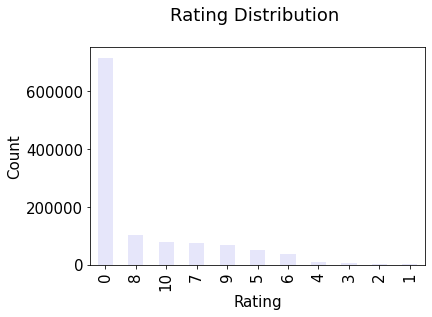

In [36]:
plt.rc("font", size=15)
df_ratings['Book-Rating'].value_counts(sort=True).plot(kind= 'bar', color= 'lavender')
plt.title('Rating Distribution \n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
# get rating distribution

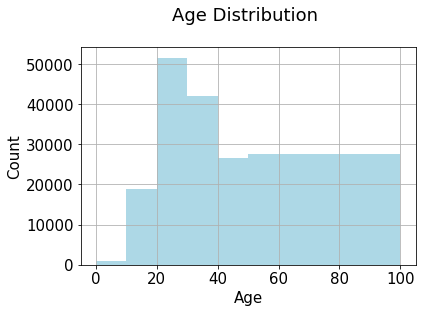

In [37]:
df_users['Age'].hist(bins = [0, 10, 20, 30, 40, 50, 100], color = 'lightblue')
plt.title('Age Distribution \n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# get age distribution

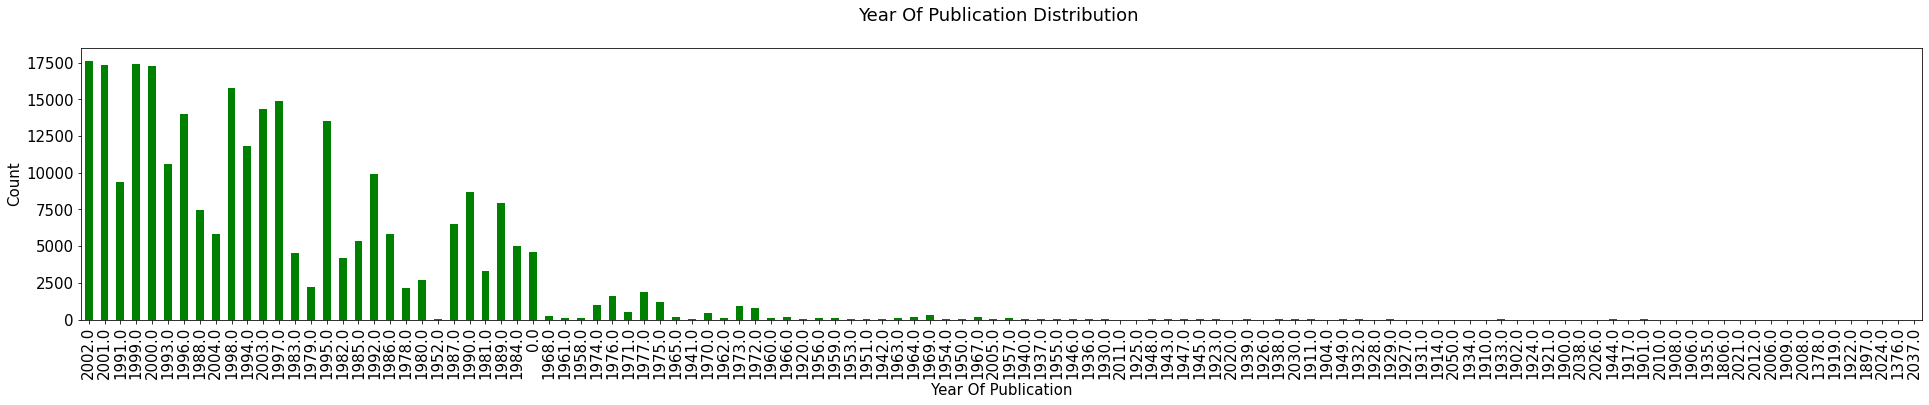

In [38]:
df_books['Year-Of-Publication'] = pd.to_numeric(df_books['Year-Of-Publication'], errors='coerce')
df_books['Year-Of-Publication'].dtypes
# convert year from object type to float
plt.rc("font", size=15)
df_books['Year-Of-Publication'].value_counts(sort=False).plot(kind= 'bar', color= 'green')
plt.title('Year Of Publication Distribution \n')
plt.xlabel('Year Of Publication')
plt.ylabel('Count')
plt.gcf().set_size_inches(33, 5)
plt.show()
# get books' year of publication distribution

In [39]:
df_books_0_rated = df_rating_to_books['Book-Title'][df_rating_to_books['Book-Rating'] == 0].value_counts().head(5)
df_books_0_rated.dtypes
# counts books which rated with 0

dtype('int64')

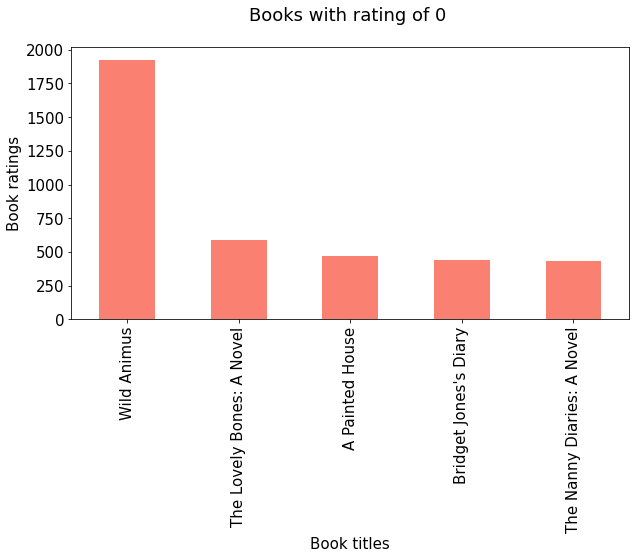

In [40]:
df_books_0_rated.plot.bar()
df_books_0_rated.plot(kind = 'bar',
                     color = 'salmon',
                    figsize = (10, 5),
                    xlabel = "Book titles",
                    ylabel = "Book ratings",
                    title = "Books with rating of 0 \n");
# get books rated with 0

<AxesSubplot:title={'center':'Books with rating of 0 \n'}, ylabel='Book-Title'>

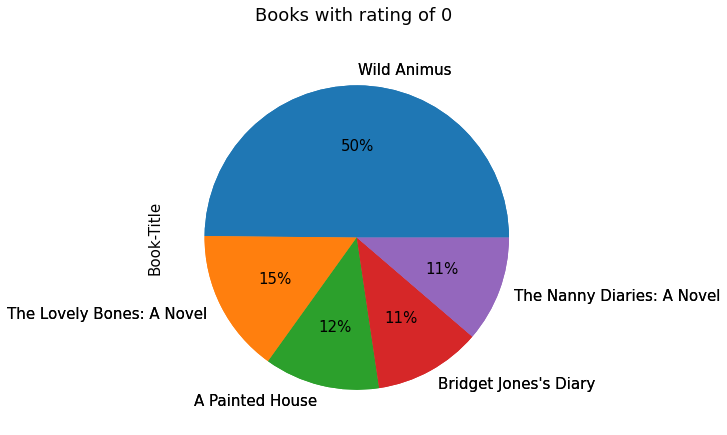

In [41]:
df_books_0_rated.plot.pie();
df_books_0_rated.plot(kind = "pie",
                     figsize = (15, 7),
                     autopct='%1.0f%%',
                     title = "Books with rating of 0 \n")
# show the o rated books in a pie

# Preparing the dataset to get the recommended books:

There are different ways to recommend books to the user, like:
* Item-Based Collaborative Filtering.
* Cosine Similarity.
* Content-Based Collaborative Filtering.

In [42]:
df_rated_books = df_rating_to_books.copy()
df_rated_books.drop(index=df_rated_books[df_rated_books['Book-Rating'] == 0].index, inplace=True) #remove books which are rated with 0

df_rated_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-AuthorFill
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,M. J. Rose
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,M. J. Rose
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,M. J. Rose
9,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,M. J. Rose
13,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,M. J. Rose


Define some fields which are useful for recommending books.

In [43]:
rating_counts = pd.DataFrame(df_rated_books['Book-Title'].value_counts()) # count the rated books based on book title
uncommon_books = rating_counts[rating_counts['Book-Title'] <= 100].index # books rated with <= 100 considred as rare books (Uncommon 100 for me research that if it applicable)
common_books = df_rated_books[~df_rated_books['Book-Title'].isin(uncommon_books)] # book which is not in the rare books is considered as popular book
random = pd.Series(common_books['Book-Title'].unique()).sample(3).values # get random 2 books from the popular books

In [44]:
df_user_book = common_books.pivot_table(index=['User-ID'], columns=['Book-Title'], values='Book-Rating')

df_user_book.head()
# construct a matrix of users and the books they rated, 
# the nan values means that the user did not rate a book or read it yet (based on udemy course they were assumming thats what the nan means)

Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,...,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Item-based Collaborative Filtering:

Get recommended books based on the item filtering.

In [45]:
# a function is created to get recommended books based on the book title input
def recommenderBasedOnItem(book_title):
    
    book_title = str(book_title)
    
    # check if the book is in the df_rated_books dataset
    if book_title in df_rated_books['Book-Title'].values:
        
        if book_title in uncommon_books:
            print('No recommendations for the given book, try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')
            print('{}'.format(random[2]),'\n')
        
        else:
            books = df_user_book[book_title]
            
            # Pandas' corrwith function makes it really easy to compute the pairwise correlation of the given book title
            # vector of user rating with every other book
            recommended_data = pd.DataFrame(df_user_book.corrwith(books).sort_values(ascending=False)).reset_index(drop=False)
            
            if book_title in [books for books in recommended_data['Book-Title']]:
                recommended_data = recommended_data.drop(recommended_data[recommended_data['Book-Title'] == book_title].index[0]) 
                # drop the given book from the recommendation list
                
            recommended_data = recommended_data[1:6]    
            
            fig, axs = plt.subplots(1, 5,figsize=(18,5))
            fig.suptitle('You may also like these books')
            for i in range(len(recommended_data['Book-Title'].tolist())):
                # get book title with image url
                url = df_rating_to_books.loc[df_rating_to_books['Book-Title'] == recommended_data['Book-Title'].tolist()[i],'Image-URL-M'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df_rated_books[df_rated_books['Book-Title'] == recommended_data['Book-Title'].tolist()[i]]['Book-Rating'].mean(),1)),
                                 y=-0.18,
                                 color="black")
                fig.show()
    else:
        print('No books in the dataset with the given book title!')

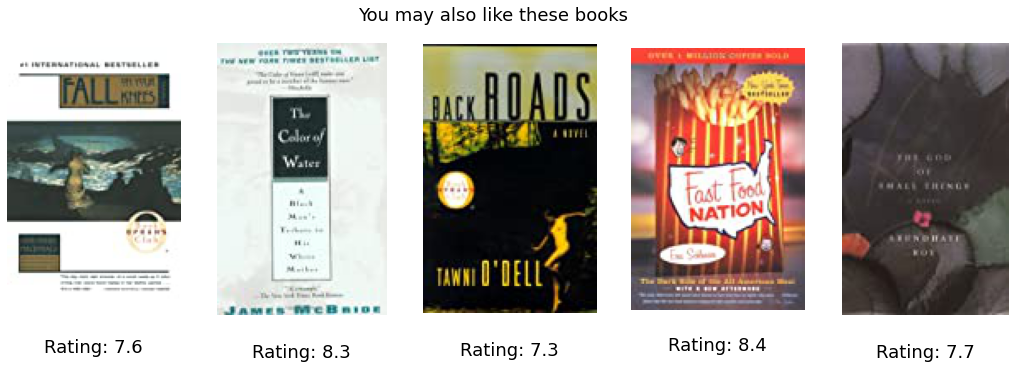

In [46]:
recommenderBasedOnItem('The Street Lawyer')

In [47]:
recommenderBasedOnItem('Flesh Tones: A Novel')

No recommendations for the given book, try: 

Jurassic Park 

Fall On Your Knees (Oprah #45) 

A Heartbreaking Work of Staggering Genius 



In [48]:
recommenderBasedOnItem('test no books')

No books in the dataset with the given book title!
